In [2]:
# run this cell if there is an error with matplotlib import 

# import sys  
# !{sys.executable} -m pip install --user matplotlib


---
PART 1A 
---

In [3]:
from matplotlib import pyplot as plt 
import numpy as np 

The function: 

In [4]:
def golden_powers_down(n, type):
    result = np.zeros([n,3], dtype=type)    # initialize the result 

    phi_1 = ((np.sqrt(5) - 1) / 2)   # define the golden mean 

    phi_n = 0.1 # start with random value 
    phi_np1 = 0.1 * phi_1   # define phi^n+1

    for i in range(n-1,-1,-1):
        phi_nm1 = phi_n + phi_np1  # n-1 step  
        phi_dir = phi_1 ** i         # direct value
        result[i,0:2] = [phi_nm1, phi_dir]

        # propagate indices 
        # phi_n = phi_nm1
        # phi_np1 = phi_n
        phi_n, phi_np1 = phi_nm1, phi_n

    result[:, 0] = np.divide(result[:,0],result[0, 0]) # normalize the values  
    result[:, 2] = 1-np.divide(result[:,0],result[:,1])   #relative error 
    return result

In [5]:
n = 31
type = 'float32'
goldown = golden_powers_down(n,type)


Now lets see the values that we got: 

In [6]:
#now lets see the values that we got 
print(goldown)

[[ 1.0000000e+00  1.0000000e+00  0.0000000e+00]
 [ 6.1803395e-01  6.1803401e-01  1.1920929e-07]
 [ 3.8196599e-01  3.8196602e-01  5.9604645e-08]
 [ 2.3606798e-01  2.3606798e-01  0.0000000e+00]
 [ 1.4589803e-01  1.4589803e-01  0.0000000e+00]
 [ 9.0169944e-02  9.0169944e-02  0.0000000e+00]
 [ 5.5728089e-02  5.5728089e-02  0.0000000e+00]
 [ 3.4441855e-02  3.4441855e-02  0.0000000e+00]
 [ 2.1286236e-02  2.1286236e-02  0.0000000e+00]
 [ 1.3155618e-02  1.3155618e-02  0.0000000e+00]
 [ 8.1306193e-03  8.1306184e-03 -1.1920929e-07]
 [ 5.0249984e-03  5.0249989e-03  1.1920929e-07]
 [ 3.1056199e-03  3.1056199e-03  0.0000000e+00]
 [ 1.9193788e-03  1.9193788e-03  0.0000000e+00]
 [ 1.1862413e-03  1.1862413e-03  0.0000000e+00]
 [ 7.3313742e-04  7.3313742e-04  0.0000000e+00]
 [ 4.5310383e-04  4.5310386e-04  5.9604645e-08]
 [ 2.8003356e-04  2.8003359e-04  1.1920929e-07]
 [ 1.7307028e-04  1.7307028e-04  0.0000000e+00]
 [ 1.0696330e-04  1.0696331e-04  5.9604645e-08]
 [ 6.6106964e-05  6.6106964e-05  0.00000

The plot of the log-error

/var/folders/k5/lffvps4j03j4yb0k1s9s0b3m0000gn/T/ipykernel_76526/2209429550.py:2: RuntimeWarning: divide by zero encountered in log10
  plt.plot(range(2,25),np.log10(abs(goldown[2:25,2])))


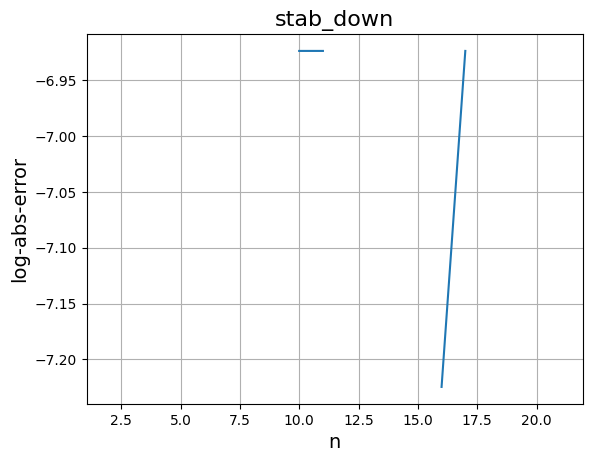

In [7]:

%matplotlib inline 
plt.plot(range(2,25),np.log10(abs(goldown[2:25,2])))
plt.title('stab_down',fontsize=16)
plt.xlabel('n',fontsize=14)
plt.ylabel('log-abs-error',fontsize=14)
plt.grid()
plt.show()


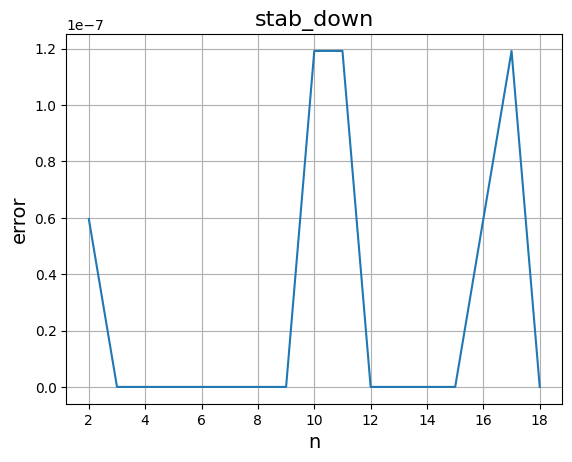

In [8]:
# stability 
%matplotlib inline 
plt.plot(range(2,19),abs(goldown[2:19,2]))
plt.title('stab_down',fontsize=16)
plt.xlabel('n',fontsize=14)
plt.ylabel('error',fontsize=14)
plt.grid()
plt.show()

Explanation: in class we saw the bottom-to-top algorithm for calculation the power of the golden mean $\phi$, and now we seen the top-to-bottom algorithm. As discussed, the top-to-bottom algorithm is more stable, because we use $\phi_n = \phi_+ $ - the positive solution. As the powers go down, there is an influence from $\phi_-$ solution, but it decreases. We get results that converge for higher N (as seen $\phi_+$ converges to 0), so that when starting from the top - the solution is stable.  
On the graphs that i got, the value of the error is mostly zero (i think that it is lower than the minimal resolution), and in some places i got "spikes" that are around $10^{-7}$ - a reasonable value for error. I got much "prettier" results with 'float64', where error rises linearly and log(abs(error)) is similar to regular log and converges around 0. 

---
PART 1B 
---

Two points derivative:

In [9]:
def derivative2p(f,x,dx): 
    return (f(x+dx) - f(x)) / dx

Three points derivative: 

In [10]:
def derivative3p(f,x,dx):
    return (f(x+dx) - f(x-dx)) / (2 * dx)

Five points derivative: 

In [11]:
def derivative5p(f,x,dx):
    return ( f(x-2*dx) - 8*f(x-dx) + 8*f(x+dx) - f(x+2*dx) ) / (12*dx)

Now to test the functions: 

In [12]:
def func(x):
    return np.sin(x)

def true_deriv(x):
    return np.cos(x)

In [13]:
np.random.seed(12345)
x = np.random.rand(10)
dx = 0.002
print('%12s %12s %12s %12s %12s ' % ('x','dfdx','err2p','err3p','err5p'))
for a in x:
    der2p = derivative2p(func,a,dx)
    der3p = derivative3p(func,a,dx)
    der5p = derivative5p(func,a,dx)
    der = true_deriv(a)
    print('%12.4e %12.4e %12.4e %12.4e %12.4e ' % (a,der,der2p/der-1,der3p/der-1,der5p/der-1))

           x         dfdx        err2p        err3p        err5p 
  9.2962e-01   5.9814e-01  -1.3405e-03  -6.6667e-07  -5.9841e-13 
  3.1638e-01   9.5037e-01  -3.2804e-04  -6.6667e-07  -5.4223e-13 
  1.8392e-01   9.8313e-01  -1.8669e-04  -6.6667e-07  -5.4456e-13 
  2.0456e-01   9.7915e-01  -2.0813e-04  -6.6667e-07  -5.3613e-13 
  5.6773e-01   8.4313e-01  -6.3843e-04  -6.6667e-07  -5.0937e-13 
  5.9554e-01   8.2784e-01  -6.7828e-04  -6.6667e-07  -5.2391e-13 
  9.6451e-01   5.6982e-01  -1.4428e-03  -6.6667e-07  -5.1592e-13 
  6.5318e-01   7.9416e-01  -7.6590e-04  -6.6667e-07  -5.3835e-13 
  7.4891e-01   7.3243e-01  -9.3022e-04  -6.6667e-07  -5.4812e-13 
  6.5357e-01   7.9392e-01  -7.6652e-04  -6.6667e-07  -5.3291e-13 


As seen in class, the more points we take into account in the calculation, the more error decreases. 

Now lets compare accuracy of sin($x=0.7$) using the above 3 functions for different dx,
starting from $dx=0.1$ down to $dx=10^{-10}$ (i.e. multiplying $dx$ by 0.1 each time).

In [14]:
a = 0.7
der = true_deriv(a)
print('%s %12.4e %s %12.4e ' % ('x=',a,'dfdx=',der))
print('%12s %12s %12s %12s ' % ('dx','err2p','err3p','err5p'))
dx = 0.1

while dx >= 1e-10:
    der2p = derivative2p(func,a,dx)
    der3p = derivative3p(func,a,dx)
    der5p = derivative5p(func,a,dx)
    print('%12.4e %12.4e %12.4e %12.4e ' % (dx,der2p/der-1,der3p/der-1,der5p/der-1))
    dx = dx * 0.1

x=   7.0000e-01 dfdx=   7.6484e-01 
          dx        err2p        err3p        err5p 
  1.0000e-01  -4.3745e-02  -1.6658e-03  -3.3294e-06 
  1.0000e-02  -4.2281e-03  -1.6667e-05  -3.3332e-10 
  1.0000e-03  -4.2131e-04  -1.6667e-07  -4.5963e-14 
  1.0000e-04  -4.2116e-05  -1.6669e-09  -2.3948e-13 
  1.0000e-05  -4.2115e-06  -2.2255e-11  -7.7395e-12 
  1.0000e-06  -4.2114e-07   2.8550e-11   8.9032e-11 
  1.0000e-07  -4.1994e-08  -6.2466e-10  -8.6659e-10 
  1.0000e-08   3.0043e-09   3.0043e-09   5.4236e-09 
  1.0000e-09   3.0043e-09   3.0043e-09   5.1390e-08 
  1.0000e-10   5.8363e-07   5.8363e-07   9.4653e-07 


As we seen, the error limits the value of $dx$ we can use. We get this when we look at the values we got from each algorithm.  

We should note, that the ideal $dx$ differs, but because the value of $dx$ is so small, we see almost the same value for different algorithms because of resolution limitations. 